In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [5]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm

x, y =data.iloc[:,:-1], data['target']
train_x, test_x, train_y, test_y = ms.train_test_split(
    x, y, test_size=0.2, random_state=22
)

model = lm.LogisticRegression()
model.fit(train_x,train_y)

pred_lg_y = model.predict(test_x)
# 分类评估指标 -- 准确率
print((pred_lg_y==test_y).sum() / test_y.size)

0.9333333333333333


**数据集划分**
+ 基于类别 test_size占比划分

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 数据集划分API
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, 
                test_size=0.25, 
                random_state=22,
                stratify=y)  # stratify按照等比例划分
model = lm.LogisticRegression()
model.fit(train_x,train_y)

pred_lg_y = model.predict(test_x)
# 分类评估指标 -- 准确率
print((pred_lg_y==test_y).sum() / test_y.size)
print(test_y.values)

0.9736842105263158
[0 0 2 1 1 0 2 1 2 0 0 2 1 0 0 0 0 2 0 2 2 2 0 1 2 1 2 1 1 1 1 2 0 1 1 0 1
 2]


**交叉验证**
+ 由于数据集划分有不确定性，若随机划分的样本正好处于某类特殊样本，则可能产生偏差
+ 需要将样本空间划分n分，多次采样训练测试，交叉验证

In [8]:
# import sklearn.model_selection as ms
# 指标值数组 = ms.cross_val_score(模型, 输入集, 输出集, 
#                           cv=折叠数, 
                            # scoring=指标名)

**交叉验证指标**
sklearn提供的常用交叉验证指标：
+ 精确度(*'accuracy'*)：分类正确的样本数 / 总样本数
+ 查准率(*'precision_weighted'*)：针对每个类别，预测正确的样本数比上预测出来的样本数
+ 召回率(*'recall_weighted'*)：针对每一个类别，预测正确的样本比上实际存在的样本数
+ f1得分(*'f1_weighted'*)：
    2 * 查准率 * 召回率 / (查准率 + 召回率)

In [9]:
# 数据集划分API
import sklearn.model_selection as ms

train_x,test_x,train_y,test_y = ms.train_test_split(x, y, 
                test_size=0.25, 
                random_state=22,
                stratify=y)  # stratify按照等比例划分
model = lm.LogisticRegression()  # 实例

# 做5次交叉验证
scores = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
print('准确度：%s' % (scores.mean()))
scores = ms.cross_val_score(model, x, y, cv=5, scoring='precision_weighted')
print('查准率：%s' % (scores.mean()))
scores = ms.cross_val_score(model, x, y, cv=5, scoring='recall_weighted')
print('召回率(查全率)：%s' % (scores.mean()))
scores = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
print('f1得分：%s' % (scores.mean()))

准确度：0.9733333333333334
查准率：0.9767676767676768
召回率(查全率)：0.9733333333333334
f1得分：0.973165236323131


In [10]:
model.fit(train_x,train_y)

pred_lg_y = model.predict(test_x)
# 分类评估指标 -- 准确率
print((pred_lg_y==test_y).sum() / test_y.size)
print(test_y.values)

0.9736842105263158
[0 0 2 1 1 0 2 1 2 0 0 2 1 0 0 0 0 2 0 2 2 2 0 1 2 1 2 1 1 1 1 2 0 1 1 0 1
 2]


**混淆矩阵**

In [11]:
# 混淆矩阵API
import sklearn.metrics as sm 
# 混淆矩阵 = sm.confusion_matrix(实际输出, 预测输出)

In [12]:
# 针对多元逻辑回归--交叉验证--评估
m = sm.confusion_matrix(test_y, pred_lg_y)
print(m)

[[13  0  0]
 [ 0 12  1]
 [ 0  0 12]]


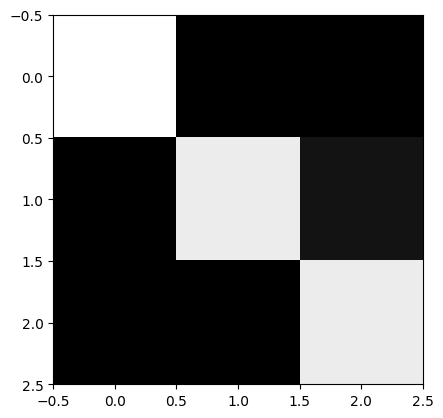

In [13]:
plt.imshow(m,cmap='gray')
plt.show()

**分类报告**
+ sklearn.metrics提供了分类报告相关API，不仅可以得到混淆矩阵信息，还可以得到交叉验证查准率、召回率、f1得分等

In [14]:
# 获取模型分类结果的分类报告相关API：
# cr = sm.classification_report('实际输出', '预测输出')

In [15]:
print(sm.classification_report(test_y, pred_lg_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



**决策树分类模型**

In [16]:
import sklearn.tree as st
model = st.DecisionTreeClassifier(max_depth=3, min_samples_split=3)
model.fit(train_x,train_y)

pred_clt_y = model.predict(test_x)
print((pred_clt_y==test_y).sum() / test_y.size)
print(test_y.values)

0.9473684210526315
[0 0 2 1 1 0 2 1 2 0 0 2 1 0 0 0 0 2 0 2 2 2 0 1 2 1 2 1 1 1 1 2 0 1 1 0 1
 2]
